In [1]:
from interpolate import *
import xarray as xr
path = "/Users/sookim/aibedo/skeleton_framework/data/rsut_Amon_CESM2_historical_r1i1p1f1_gn_185001-201412.nc"
ds = xr.open_dataset(path)
data = np.asarray(ds.rsut[0])
lon_list = list(np.asarray(ds.rsut[0].lon))
lat_list = list(np.asarray(ds.rsut[0].lat))

/Users/sookim/miniconda3/envs/deepsphere/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'rsut' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


In [2]:
lon, lat, interpolated_value = interpolate_SphereIcosahedral( 5, data, lon_list, lat_list)

number of vertices for level 5 (2**5)is 10242


In [3]:
print(len(interpolated_value))

10242


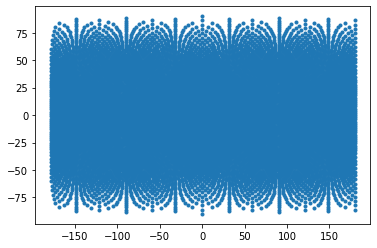

In [4]:
plt.scatter(lon, lat, marker='.')

In [5]:
def resolution_SphereIcosahedral(lon,lat):
    lat_list = []
    for i in range(len(lon)):
        if lon[i] == 0.0:
            lat_list.append(lat[i])
    lat_list.sort()
    j=lat_list.index(0.0)
    assert((lat_list[j]-lat_list[j-1])==(lat_list[j+1]-lat_list[j]))
    return (lat_list[j]-lat_list[j-1])*111 # km resolution

In [6]:
resolution_SphereIcosahedral(lon,lat)

220.03997872951078

In [7]:
lon, lat, interpolated_value = interpolate_SphereIcosahedral( 4, data, lon_list, lat_list)

number of vertices for level 4 (2**4)is 2562


In [8]:
resolution_SphereIcosahedral(lon,lat)

440.07995745902144

In [9]:
lon, lat, interpolated_value = interpolate_SphereIcosahedral( 3, data, lon_list, lat_list)

number of vertices for level 3 (2**3)is 642


In [10]:
resolution_SphereIcosahedral(lon,lat)

880.1599149180429

In [11]:
lon, lat, interpolated_value = interpolate_SphereIcosahedral( 2, data, lon_list, lat_list)

number of vertices for level 2 (2**2)is 162


In [12]:
resolution_SphereIcosahedral(lon,lat)

1760.3198298360862

In [13]:
lon, lat, interpolated_value = interpolate_SphereIcosahedral( 1, data, lon_list, lat_list)

number of vertices for level 1 (2**1)is 42


In [14]:
resolution_SphereIcosahedral(lon,lat)

3520.6396596721715

In [15]:
lon, lat, interpolated_value = interpolate_SphereHealpix(32, 8, data, lon_list, lat_list)

number of vertices for sub-divsion 32 neighbor8 is 12288


In [52]:
def resolution_SphereHealpixl(lon,lat):
    lon_list = []
    for i in range(len(lat)):
        if lat[i] == 0.0:
            lon_list.append(lon[i])
    lon_list.sort()
    resolution = []
    for j in range(len(lon_list)-1):
        resolution.append(lon_list[j+1]-lon_list[j])
    return np.mean(resolution)*111 #km

In [53]:
resolution_SphereHealpixl(lon,lat)

312.1875

In [57]:
for i in [4,8,16,32,64,128]:
    lon, lat, interpolated_value = interpolate_SphereHealpix(i, 8, data, lon_list, lat_list)
    print("   ---> resolution: "+str(resolution_SphereHealpixl(lon,lat))+"km")

number of vertices for sub-divsion 4 neighbor8 is 192
   ---> resolution: 2497.5km
number of vertices for sub-divsion 8 neighbor8 is 768
   ---> resolution: 1248.75km
number of vertices for sub-divsion 16 neighbor8 is 3072
   ---> resolution: 624.375km
number of vertices for sub-divsion 32 neighbor8 is 12288
   ---> resolution: 312.1875km
number of vertices for sub-divsion 64 neighbor8 is 49152
   ---> resolution: 156.09375km
number of vertices for sub-divsion 128 neighbor8 is 196608
   ---> resolution: 78.046875km
